<a href="https://colab.research.google.com/github/0liv3ira/TCC-Data/blob/main/P3_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  #Plotar gráficos
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler  #Normalizar os dados
from sklearn.decomposition import PCA  #Lib para cálculo dos fatores principais

In [ ]:
df = pd.read_csv("WORKLOAD.tsv", sep='\t')
df.shape

(153390, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153390 entries, 0 to 153389
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    153390 non-null  int64  
 1   DATE          153390 non-null  object 
 2   TIME          153390 non-null  object 
 3   CPU3          153390 non-null  float64
 4   CPU2          153390 non-null  float64
 5   IO_DISK1      153390 non-null  int64  
 6   IO_DISK2      153390 non-null  int64  
 7   IO_DISK3      153390 non-null  int64  
 8   READS_DISK1   153390 non-null  float64
 9   READS_DISK2   153390 non-null  float64
 10  READS_DISK3   153389 non-null  float64
 11  WRITES_DISK1  153389 non-null  float64
 12  WRITES_DISK2  153389 non-null  float64
 13  WRITES_DISK3  153389 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 16.4+ MB


In [ ]:
df.head()

,Unnamed: 0,DATE,TIME,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
0,0,2023-01-24,05:13:00,8.919091,104.533151,75,616,7,10.773920,8.245730,1.867983e+07,2.701182,1.004415e+00,7.755294e+06
1,1,2023-01-17,13:21:00,6.352267,1.348326,74,805,10,10.107078,3.335116,1.832761e-05,2.077675,9.135174e+04,1.386328e+06
2,2,2023-01-20,01:08:00,13.267720,0.175701,35,174,5,18.139521,4.947451,9.903657e+07,6.717166,1.798021e+06,5.641578e+06
3,3,2023-01-21,01:28:00,19.119685,100.152888,86,256,4,10.643224,11.326079,1.259655e+04,1.584188,5.120315e-05,1.002189e+06
4,4,2023-01-01,15:56:00,208.729528,2.705195,69,335,6,27.371631,3.745046,1.608333e+08,20.749092,2.867790e+01,4.261794e+06


In [ ]:
df.tail()

,Unnamed: 0,DATE,TIME,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
153385,153385,2023-01-18,03:30:00,22.256084,7.320111,32,367,9,10.080847,5.167205,5.235738e-04,54.015656,0.032592,1.485558e+07
153386,153386,2023-01-06,16:33:00,9.420524,5.175432,57,203,10,11.855601,3.784561,1.484454e+07,81.709347,489.900922,1.070489e+06
153387,153387,2023-01-23,23:44:00,10.307894,3.275165,69,284,3,14.564276,4.332615,2.239268e+14,0.495284,72.368128,1.299813e+06
153388,153388,2023-01-15,18:36:00,8.093058,4.950533,90,972,8,10.158752,7.885950,3.457200e+08,4.648496,5271.357372,1.816634e+06
153389,153389,2023-01-16,02:01:00,9.612214,0.032702,89,478,7,13.293928,4.216709,NaN,NaN,NaN,NaN


<h3>Obtendo uma amostra com 3% totao de registros e uniforme</h3>

In [ ]:
sample_size = int(len(df) * 0.03)
sample_df = df.sample(n=sample_size, random_state=42)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 24480 to 55646
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4601 non-null   int64  
 1   DATE          4601 non-null   object 
 2   TIME          4601 non-null   object 
 3   CPU3          4601 non-null   float64
 4   CPU2          4601 non-null   float64
 5   IO_DISK1      4601 non-null   int64  
 6   IO_DISK2      4601 non-null   int64  
 7   IO_DISK3      4601 non-null   int64  
 8   READS_DISK1   4601 non-null   float64
 9   READS_DISK2   4601 non-null   float64
 10  READS_DISK3   4601 non-null   float64
 11  WRITES_DISK1  4601 non-null   float64
 12  WRITES_DISK2  4601 non-null   float64
 13  WRITES_DISK3  4601 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 539.2+ KB


<h2>Questão 1</h2>

In [ ]:
statistics  = sample_df.describe()

cv = (statistics.loc['std'] / statistics.loc['mean']) * 100 # coeficiente de variação

statistics.loc['cv'] = cv  #Adiciono cv na tabela

range_values = statistics.loc['max'] - statistics.loc['min']  # Calculo o range de cada feature

statistics.loc['range'] = range_values # Adiciono range na tabela de estatística

print(statistics)

          Unnamed: 0         CPU3         CPU2     IO_DISK1     IO_DISK2  \
count    4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean    77347.682460    17.427420    20.278763    53.714193   531.643990   
std     43668.604789    32.972189    77.301370    27.011049   275.089063   
min        89.000000     6.330418     0.004608     7.000000    50.000000   
25%     40254.000000     7.661889     0.997530    30.000000   293.000000   
50%     77124.000000    10.101548     3.552609    54.000000   537.000000   
75%    114998.000000    16.364955    12.574228    77.000000   769.000000   
max    153386.000000   939.902830  2246.102639   100.000000  1000.000000   
cv         56.457548   189.197196   381.193720    50.286615    51.743097   
range  153297.000000   933.572412  2246.098031    93.000000   950.000000   

          IO_DISK3  READS_DISK1  READS_DISK2   READS_DISK3  WRITES_DISK1  \
count  4601.000000  4601.000000  4601.000000  4.601000e+03   4601.000000   
mean      6

<h2>Questão 2</h2>

In [ ]:
variables = ['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1',
             'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']

In [ ]:
# Função para plotar os gráficos
def plot_all_graphs(data_frame):
    for var in variables:
        plt.figure(figsize=(18, 5))

        # Box Plot
        plt.subplot(1, 4, 1)
        plt.boxplot(data_frame[var])
        plt.title('Box Plot')

        # Histogram
        plt.subplot(1, 4, 2)
        plt.hist(data_frame[var], bins=20, density=True, alpha=0.7)
        plt.title('Histogram')

        # CDF
        plt.subplot(1, 4, 3)
        sorted_data = np.sort(data_frame[var])
        yvals = np.arange(len(sorted_data)) / float(len(sorted_data))
        plt.plot(sorted_data, yvals, marker='.', linestyle='none')
        plt.title('CDF')

        # Scatter Plot
        for other_var in variables:
            if other_var != var:
                plt.subplot(1, 4, 4)
                plt.scatter(data_frame[var], data_frame[other_var], alpha=0.3, label=other_var)
                plt.title(f'Scatter Plot: {var} vs Others')
                plt.xlabel(var)
                plt.ylabel('Other Variables')
                plt.legend()

        plt.tight_layout()
        plt.suptitle(var, y=1.05)
        plt.show()

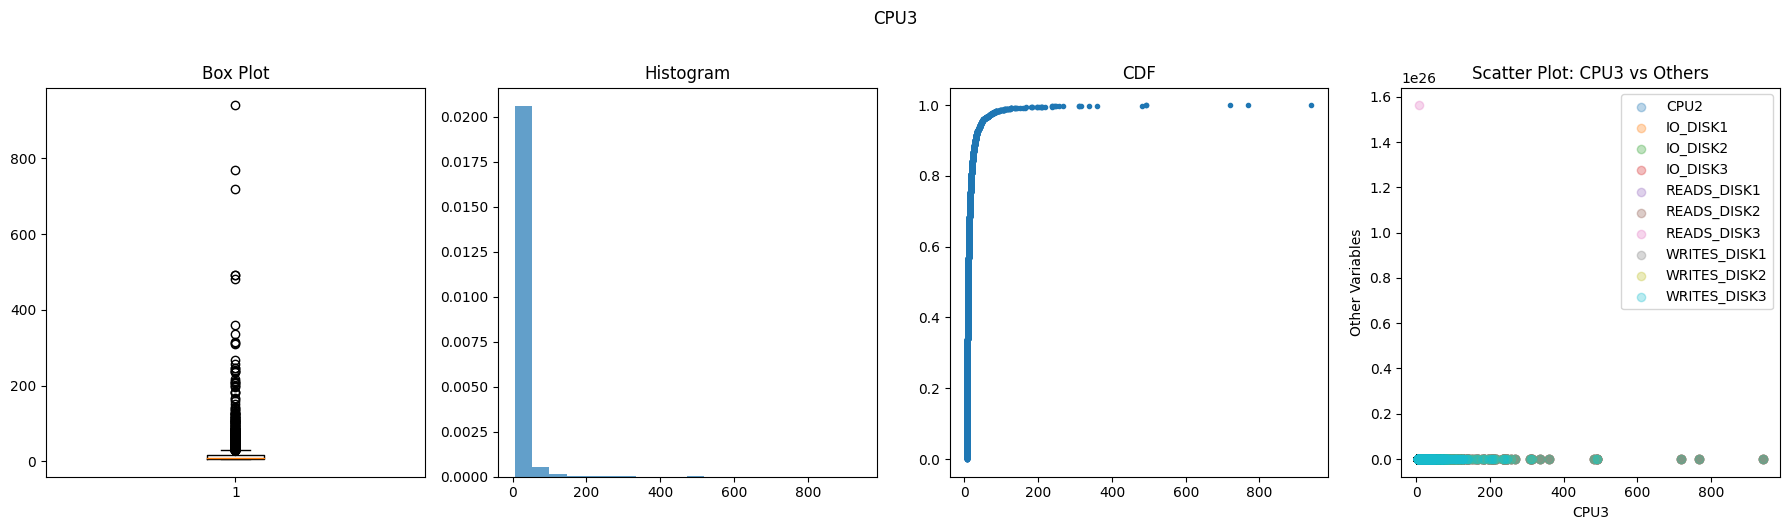

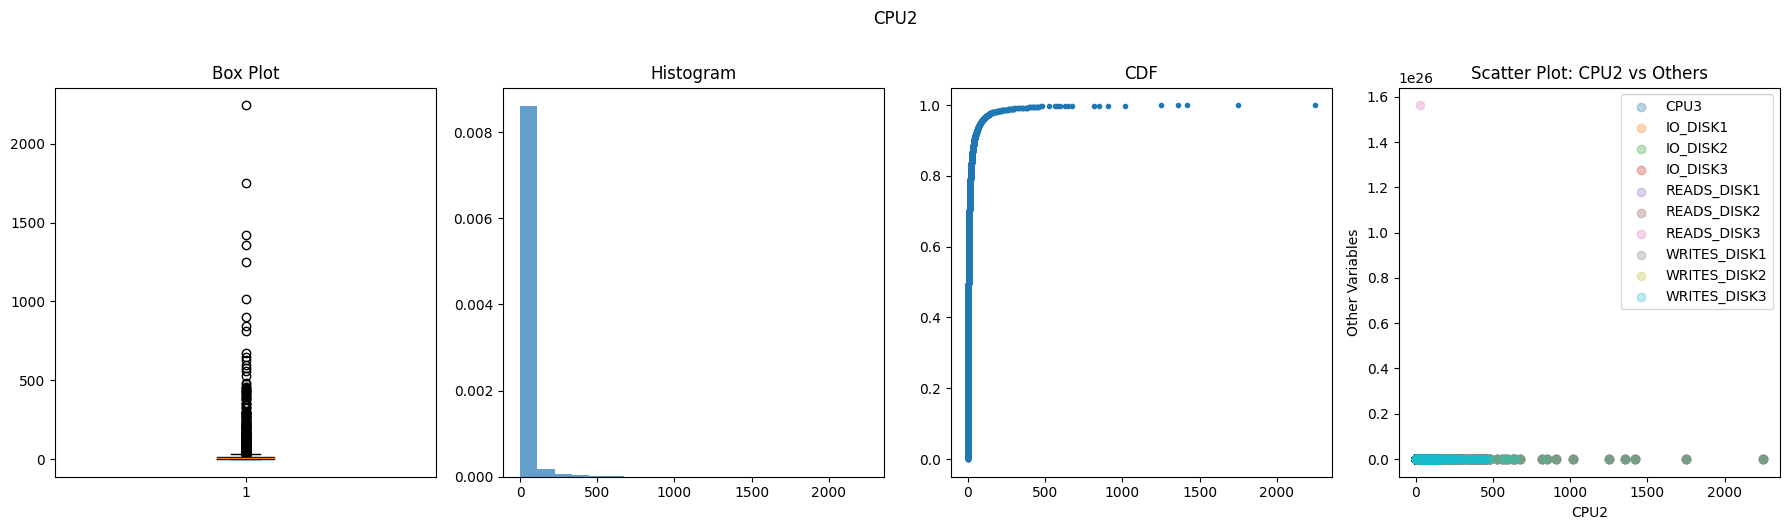

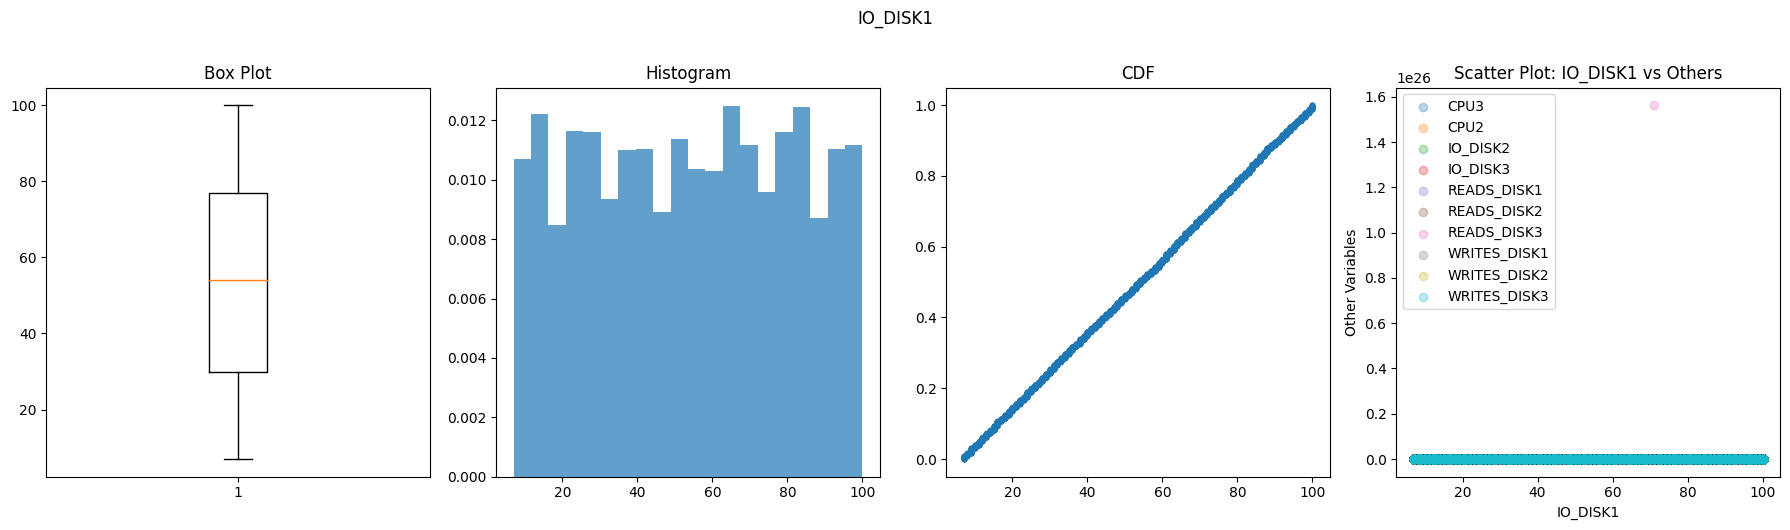

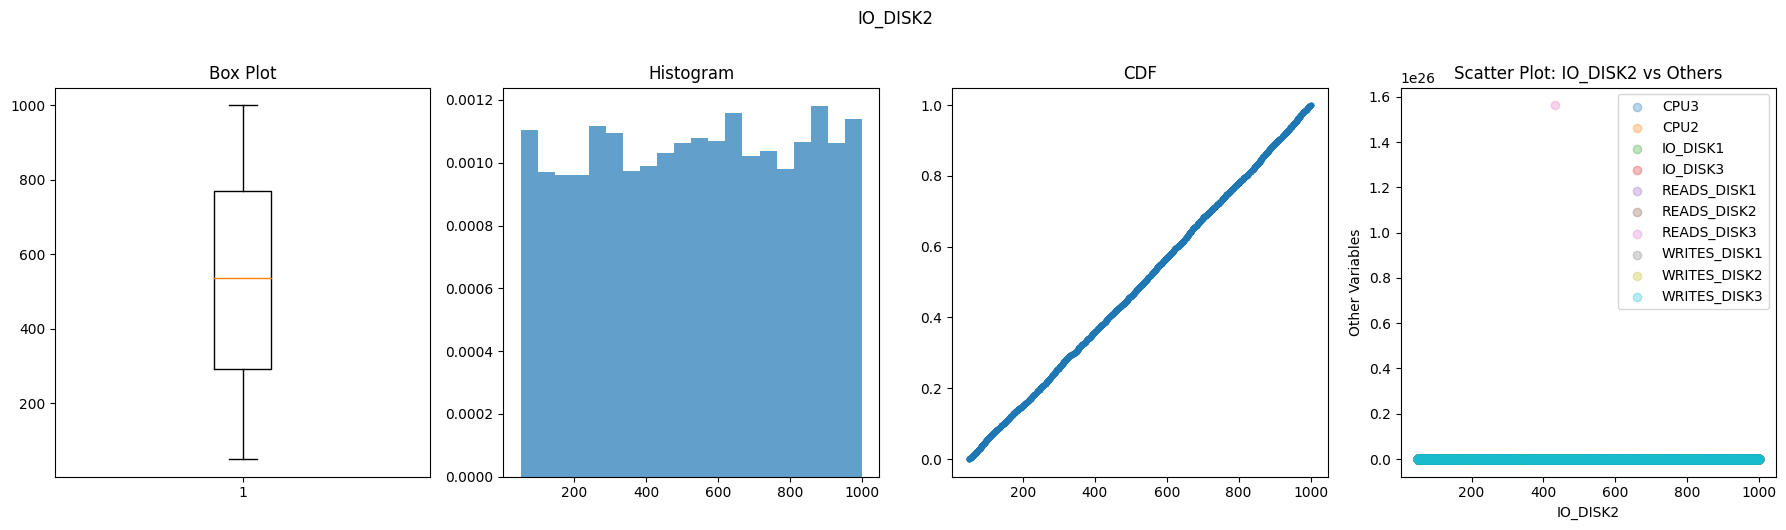

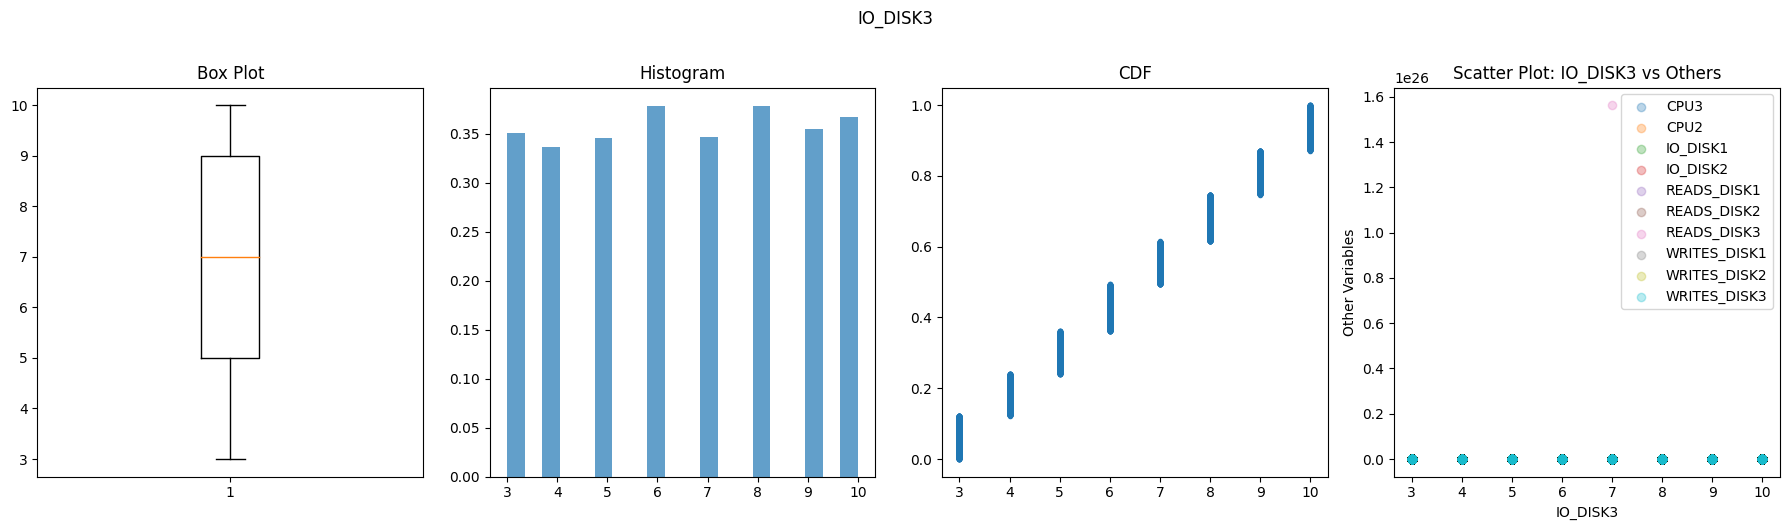

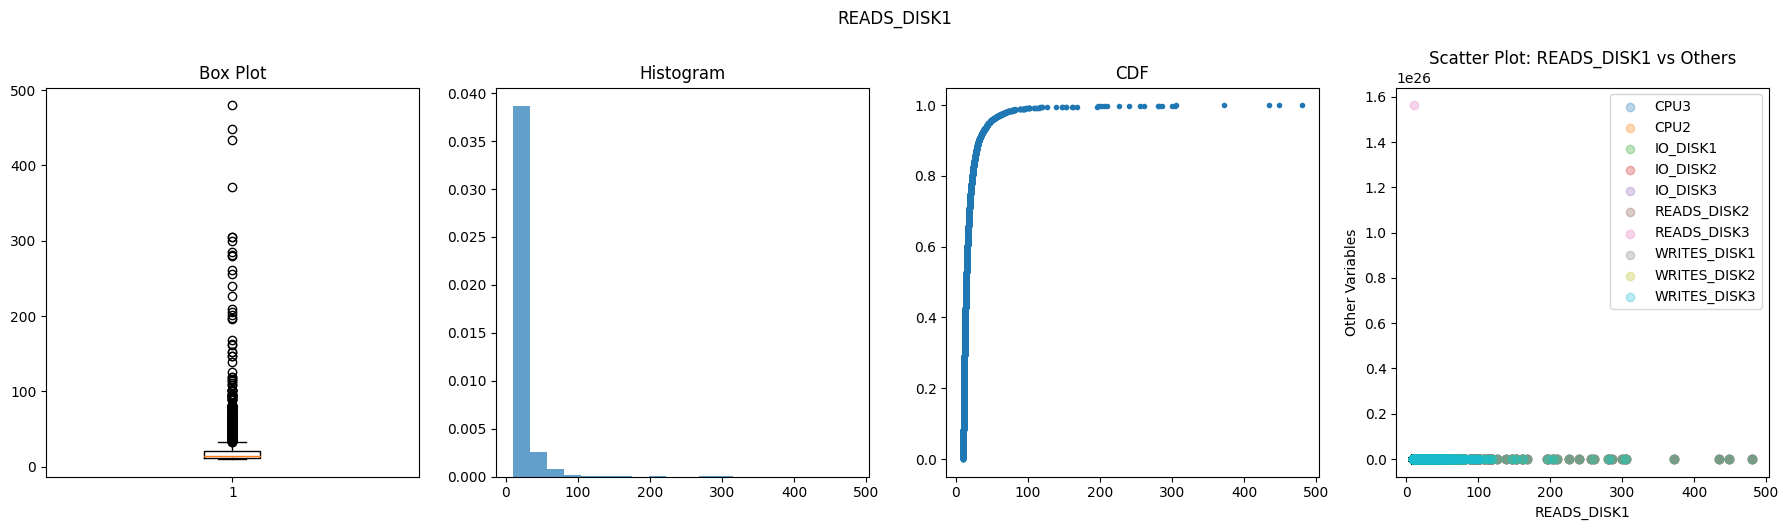

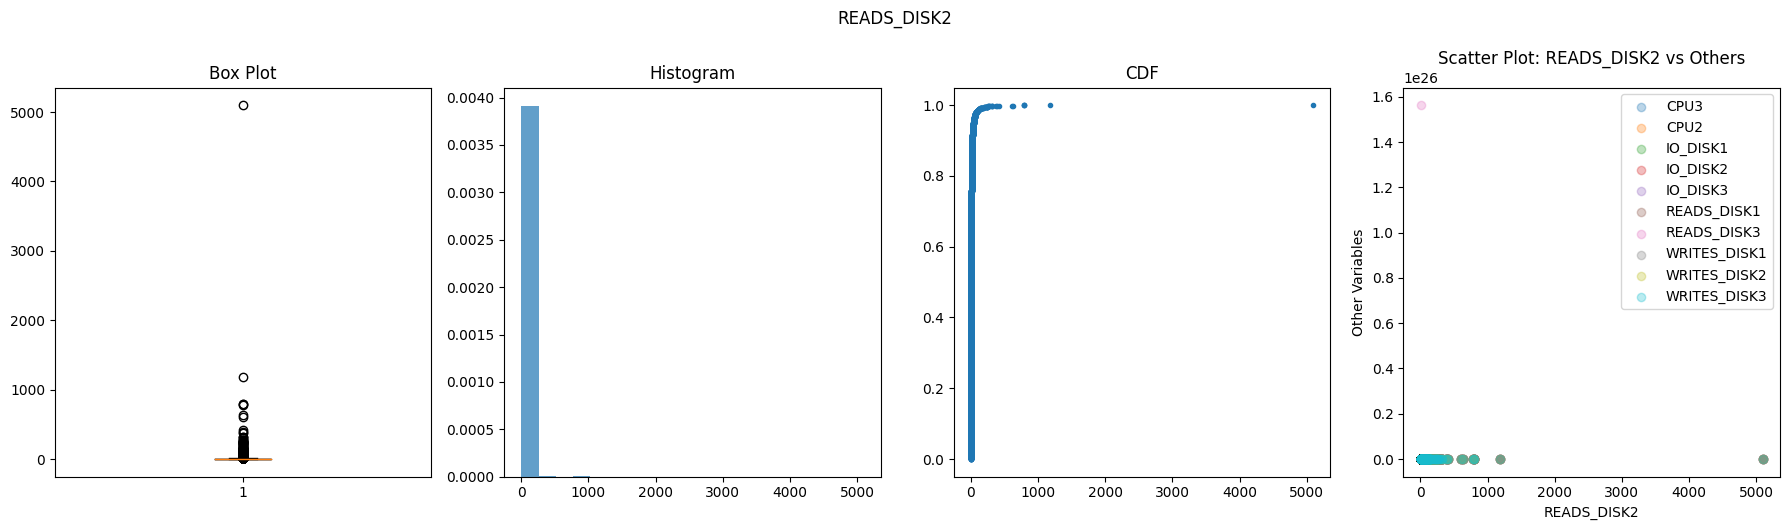

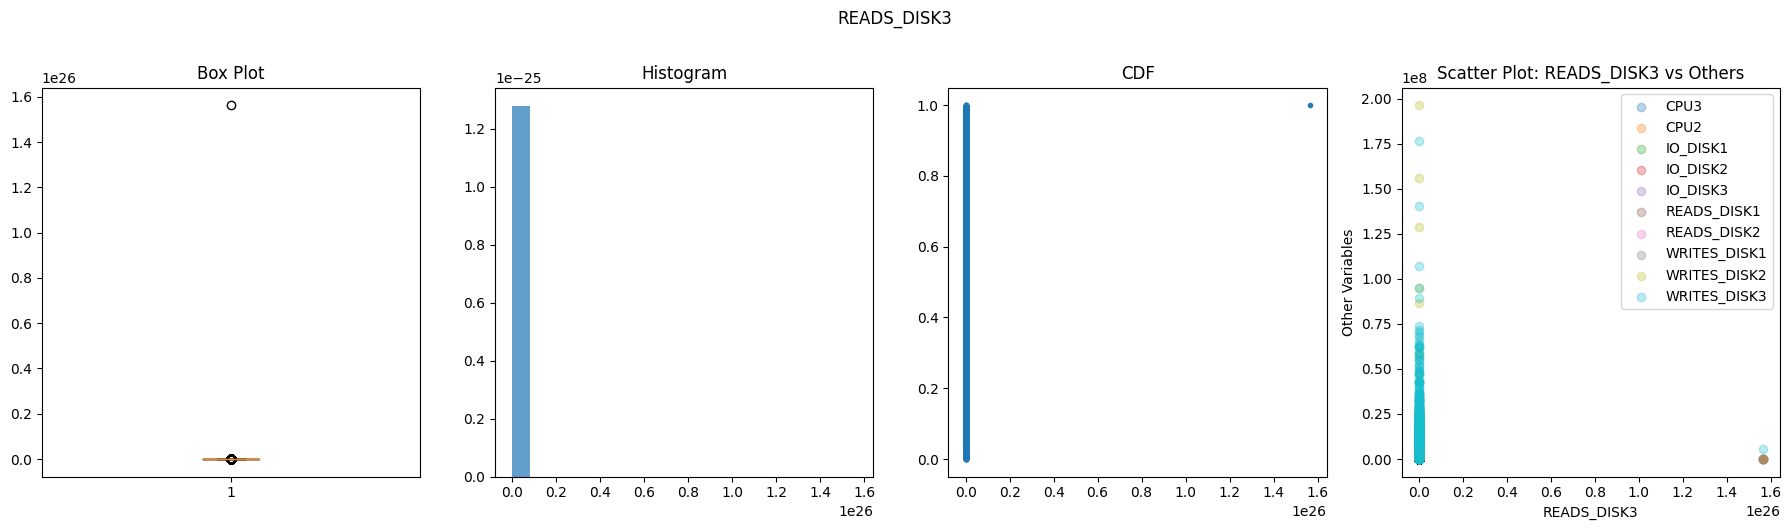

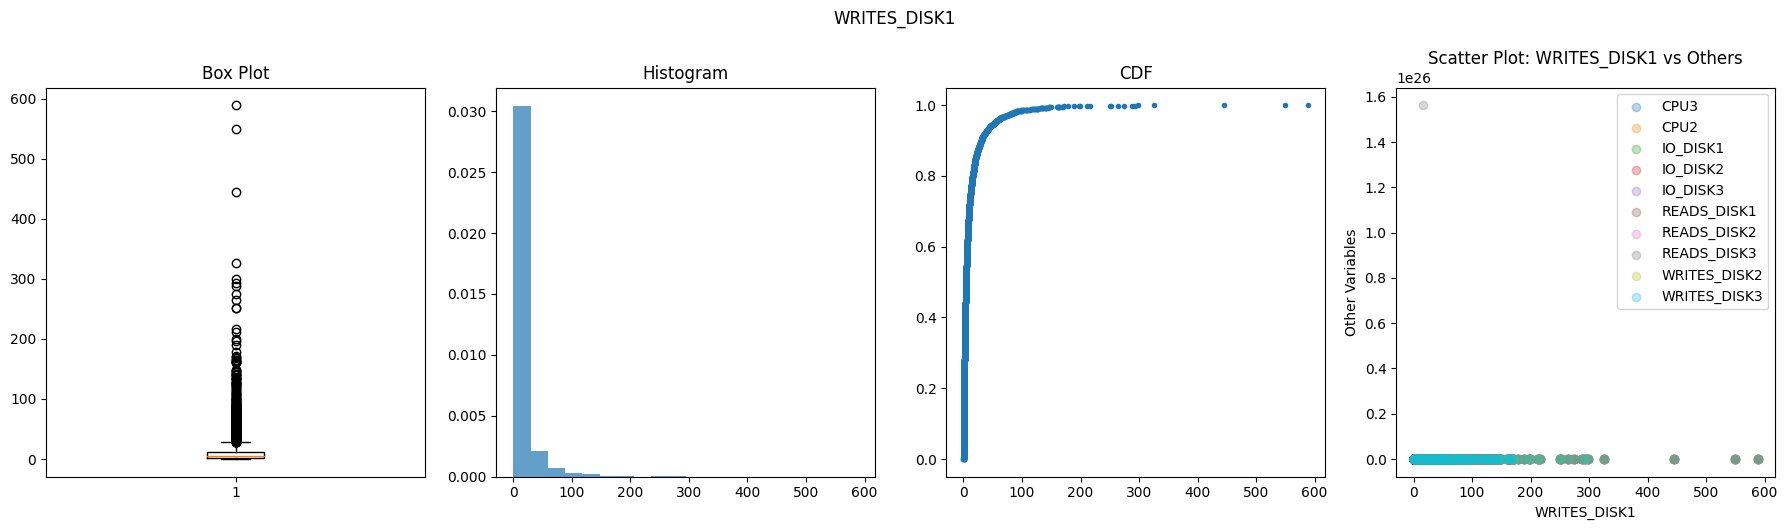

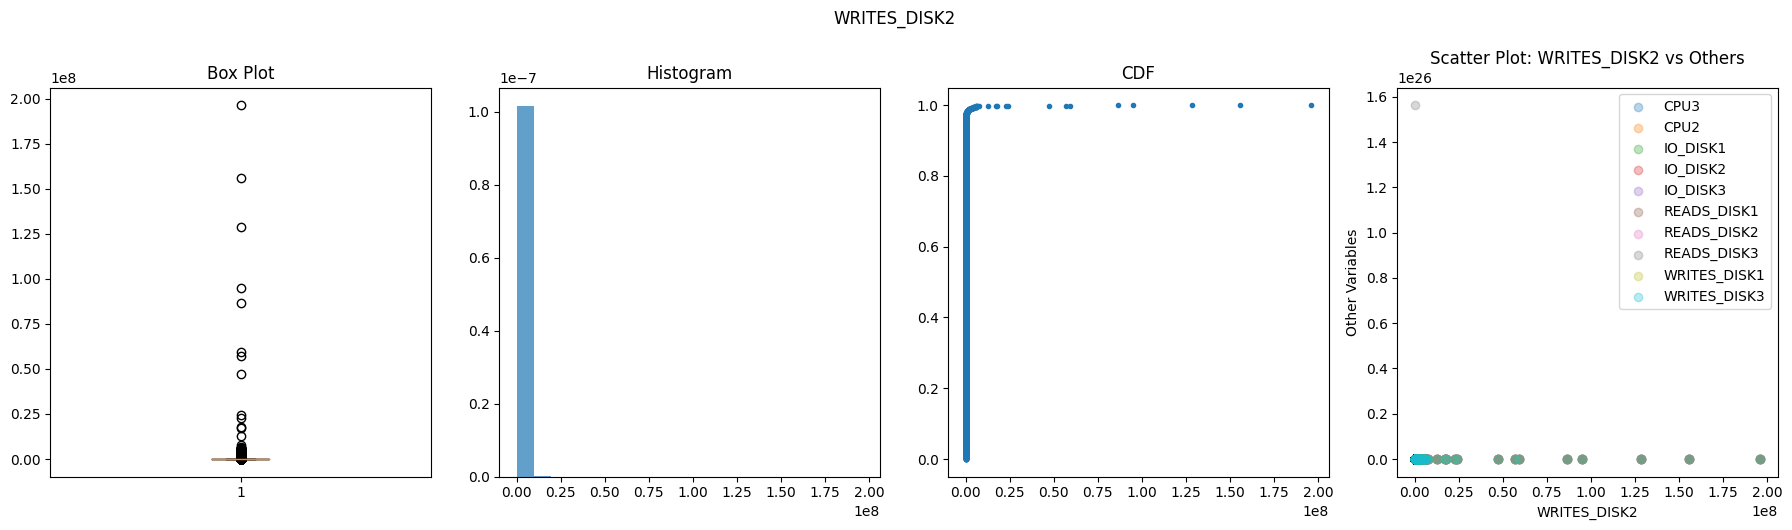

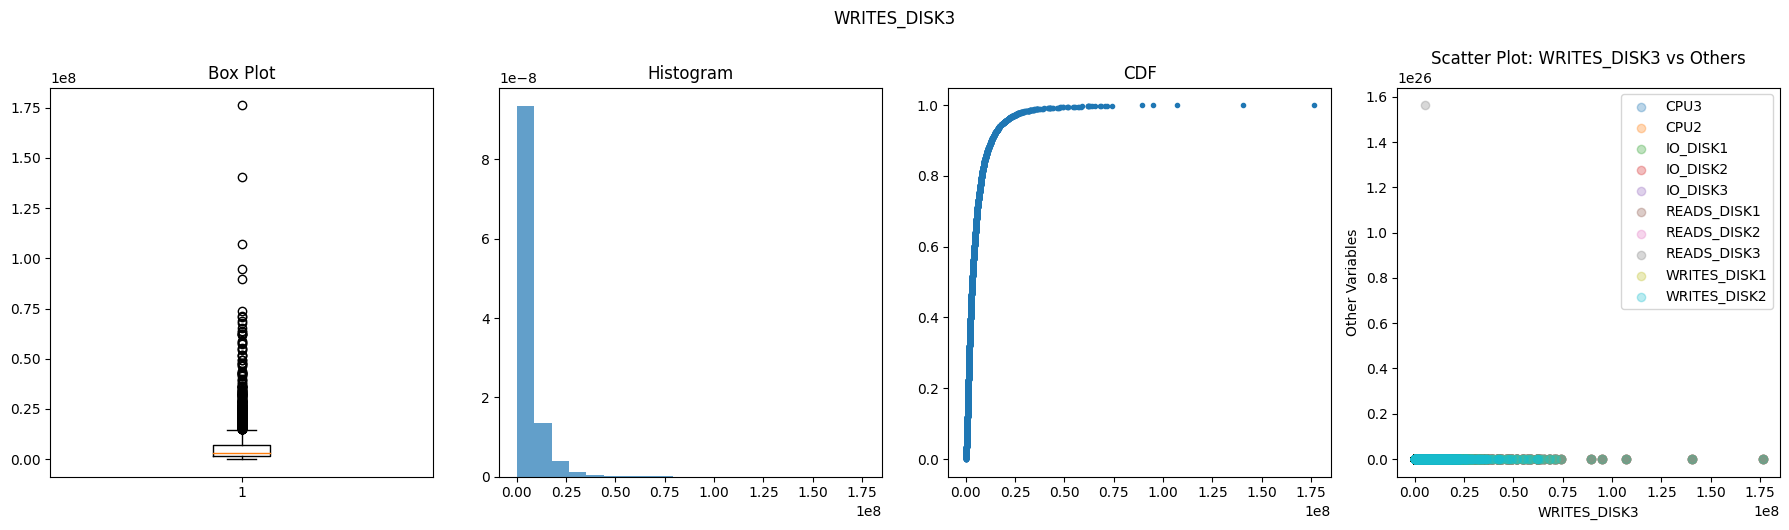

In [ ]:
plot_all_graphs(sample_df)

In [ ]:
df["WRITES_DISK2"].head()

0    1.004415e+00
1    9.135174e+04
2    1.798021e+06
3    5.120315e-05
4    2.867790e+01
Name: WRITES_DISK2, dtype: float64

In [ ]:
df["IO_DISK2"].head()

0    616
1    805
2    174
3    256
4    335
Name: IO_DISK2, dtype: int64

<h2>Devido o resultado do item 2, se faz necessário normalizar os nossos dados, então é oque faremos agora :</h2>

In [ ]:
columns_to_transform = ['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1',
             'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']
df_log = sample_df.copy()
df_log[columns_to_transform] = np.log(sample_df[columns_to_transform])
df_log.head()

,Unnamed: 0,DATE,TIME,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
24480,24480,2023-01-16,05:47:00,2.009840,0.802770,4.262680,6.740519,1.386294,2.942694,1.333631,-34.777749,0.110819,3.170319,16.028650
52014,52014,2023-01-24,08:02:00,2.145564,-0.827065,4.532599,6.858565,1.386294,2.449120,1.317106,5.660947,2.753915,2.164689,15.986524
130049,130049,2023-01-30,04:14:00,1.854609,-0.319153,4.276666,4.543295,2.302585,2.962181,1.343954,-2.138449,0.323781,4.291714,16.275433
130434,130434,2023-01-21,09:30:00,3.690104,1.421675,2.197225,6.343880,2.197225,3.157054,1.270800,3.348378,0.928208,2.844417,13.628271
79736,79736,2023-01-26,20:48:00,2.205756,3.644534,3.401197,6.380123,2.197225,3.020448,1.369661,15.651848,2.918605,-0.603651,17.181709


<h2>Análise de PCA - questão 5</h2>

In [ ]:
df_log.describe()

,Unnamed: 0,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,77347.682460,2.512222,1.268770,3.806728,6.079511,1.809730,2.806319,2.002337,5.321033,1.460901,2.877224,15.002511
std,43668.604789,0.655193,1.896640,0.661020,0.708616,0.387105,0.504722,0.817095,14.964235,1.502827,5.036514,1.083499
min,89.000000,1.845366,-5.379918,1.945910,3.912023,1.098612,2.302592,1.185370,-57.015748,-4.939974,-14.745917,11.407099
25%,40254.000000,2.036259,-0.002473,3.401197,5.680173,1.609438,2.441154,1.425354,-4.927146,0.419393,-0.635036,14.278790
50%,77124.000000,2.312689,1.267682,3.988984,6.285998,1.945910,2.652560,1.748998,5.329180,1.459481,2.851706,15.008188
75%,114998.000000,2.795142,2.531649,4.343805,6.645091,2.197225,3.004587,2.307962,15.403462,2.490833,6.232616,15.745418
max,153386.000000,6.845776,7.716952,4.605170,6.907755,2.302585,6.173861,8.536733,60.314058,6.378265,19.095123,18.987483


<h3>Normalizando :</h3>

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1',
             'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']
df_normalized = df_log[columns_to_normalize].copy()
df_normalized = df_log[columns_to_normalize].copy()
df_normalized = scaler.fit_transform(df_normalized)

#Cria um DF normalizado
df_normalized = pd.DataFrame(df_normalized, columns=columns_to_normalize)
df_normalized.head()  # Visualizar os primeiros registros do DataFrame normalizado



,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
0,0.032892,0.472074,0.871208,0.944175,0.238944,0.165347,0.020168,0.189534,0.446253,0.529423,0.609672
1,0.060035,0.347629,0.972710,0.983580,0.238944,0.037850,0.017920,0.534192,0.679778,0.499707,0.604115
2,0.001848,0.386410,0.876468,0.210724,1.000000,0.170380,0.021572,0.467718,0.465068,0.562560,0.642228
3,0.368917,0.519330,0.094505,0.811774,0.912489,0.220719,0.011621,0.514482,0.518471,0.519793,0.293016
4,0.072072,0.689054,0.547253,0.823872,0.912489,0.185432,0.025069,0.619345,0.694329,0.417903,0.761783


In [ ]:
correlation_matrix = df_normalized.corr()
print(correlation_matrix)

                  CPU3      CPU2  IO_DISK1  IO_DISK2  IO_DISK3  READS_DISK1  \
CPU3          1.000000 -0.002229 -0.004791  0.007839  0.013325     0.008090   
CPU2         -0.002229  1.000000 -0.001600 -0.008241  0.015809     0.008632   
IO_DISK1     -0.004791 -0.001600  1.000000 -0.001986 -0.026346     0.007133   
IO_DISK2      0.007839 -0.008241 -0.001986  1.000000  0.018332     0.006625   
IO_DISK3      0.013325  0.015809 -0.026346  0.018332  1.000000    -0.021032   
READS_DISK1   0.008090  0.008632  0.007133  0.006625 -0.021032     1.000000   
READS_DISK2  -0.004746 -0.011266 -0.008003 -0.004771 -0.015224    -0.008347   
READS_DISK3   0.007670  0.017816  0.016572 -0.002924 -0.013513     0.005507   
WRITES_DISK1 -0.001127  0.028594 -0.001108 -0.015484 -0.011097    -0.006273   
WRITES_DISK2 -0.023972 -0.010332 -0.024970  0.006078  0.006153    -0.010760   
WRITES_DISK3 -0.012609  0.004086 -0.014589 -0.015029  0.009825    -0.001762   

              READS_DISK2  READS_DISK3  WRITES_DISK

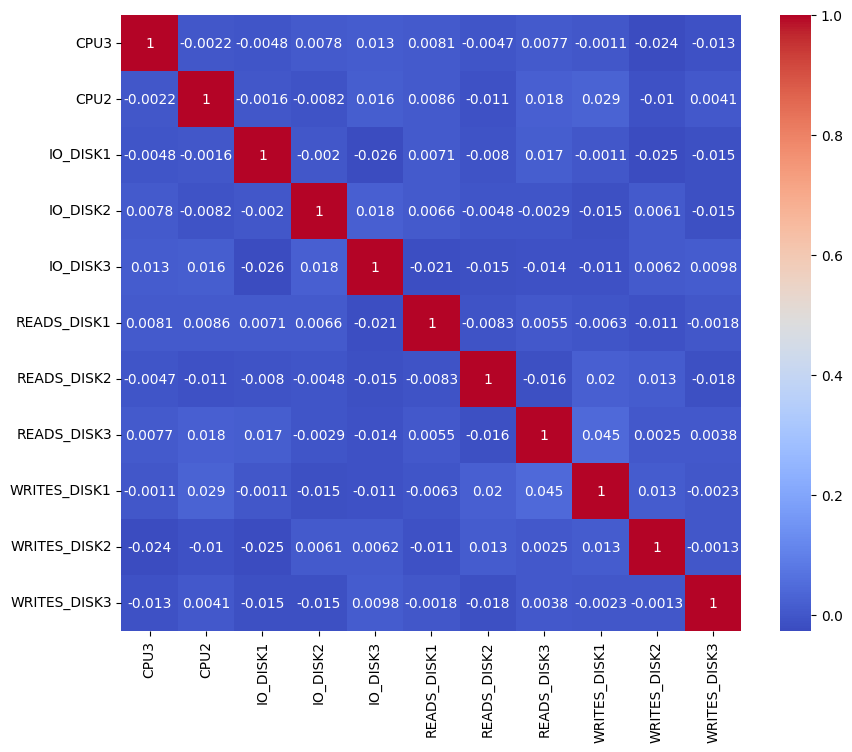

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print("Autovalores",eigenvalues)
print("\n")
print("Autovetores",eigenvectors)

Autovalores [1.07311704 1.05448952 1.04627013 0.93914403 0.94463662 0.9542906
 1.02398473 0.96998935 0.99064208 1.00555809 0.99787781]


Autovetores [[ 0.01539486 -0.29469212  0.2380923  -0.04144166 -0.40077063 -0.21976292
  -0.48296308 -0.09823952  0.49091545  0.38281995 -0.12307693]
 [-0.32509238  0.10579828  0.43352173  0.21207486 -0.4330993   0.03767683
  -0.06192526 -0.03415779 -0.64562657  0.10247943 -0.16992085]
 [-0.29451386 -0.42962447 -0.21274513 -0.11192769 -0.13189397 -0.58644657
   0.09776769  0.1211386  -0.20608739 -0.09952759  0.48266932]
 [ 0.25746926 -0.14378744  0.08421402 -0.08826918 -0.17395899  0.21905936
  -0.46280145  0.5383866  -0.08672431 -0.5505322   0.07245994]
 [ 0.34044493  0.18122727  0.52839143  0.00984897  0.5076218  -0.45895399
  -0.20439185  0.00801186 -0.16451813  0.07607751  0.17013683]
 [-0.15159664 -0.36273535 -0.00515883 -0.06857259  0.28110965 -0.27184842
   0.01116898 -0.04397635 -0.05918387 -0.30694841 -0.76681796]
 [ 0.00409721  0.28021837 -0.

<h5>Aplicando o PCA</h5>

In [ ]:
from sklearn.decomposition import PCA

num_components =3  # Escolha o número de componentes principais desejado
pca = PCA(n_components=num_components)

principal_components = pca.fit_transform(df_normalized)
components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

print(components_df)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


           PC1       PC2       PC3
0     0.350303 -0.146999 -0.232548
1     0.357660 -0.251657 -0.269665
2    -0.384860 -0.198715  0.522746
3    -0.355189  0.586037 -0.078839
4    -0.332888  0.135954 -0.081546
...        ...       ...       ...
4596 -0.206681 -0.294390  0.205333
4597  0.589208 -0.030333 -0.247261
4598  0.003159  0.248793  0.051278
4599  0.022594 -0.181771 -0.024925
4600  0.578625  0.126165 -0.125547

[4601 rows x 3 columns]
Explained Variance Ratio: [0.28365151 0.16904776 0.15319992]


In [ ]:
component_loadings = pca.components_

loadings_df = pd.DataFrame(component_loadings, columns=df_normalized.columns, index=[f'PC{i+1}' for i in range(num_components)])

print(loadings_df)

         CPU3      CPU2  IO_DISK1  IO_DISK2  IO_DISK3  READS_DISK1  \
PC1 -0.006597 -0.008751  0.050700 -0.029339 -0.998091     0.010209   
PC2  0.002535  0.000220 -0.998241  0.007546 -0.051189    -0.004263   
PC3 -0.005866  0.008945 -0.008969 -0.999259  0.028857    -0.005954   

     READS_DISK2  READS_DISK3  WRITES_DISK1  WRITES_DISK2  WRITES_DISK3  
PC1     0.005888     0.006665      0.005649     -0.004188     -0.005568  
PC2     0.005114    -0.010892      0.001274      0.022971      0.011800  
PC3     0.002501     0.001985      0.012492     -0.005673      0.014840  


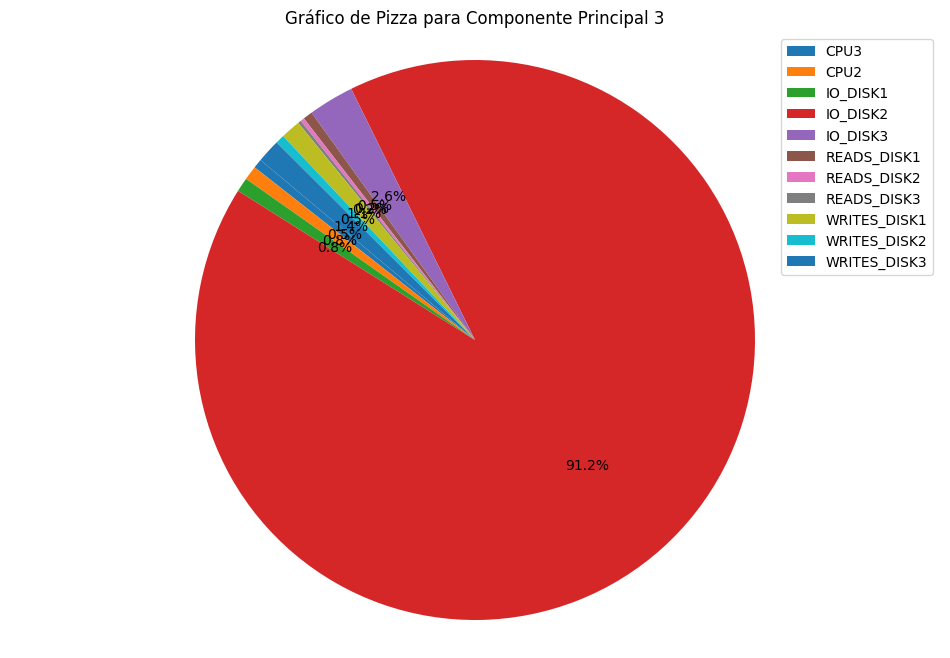

In [ ]:
import matplotlib.pyplot as plt

# Escolha o número do componente principal que você deseja visualizar
component_number = 3

# Coeficientes das cargas para o componente principal escolhido
loadings = loadings_df.loc[f'PC{component_number}']

# Labels das features
feature_labels = loadings.index

# Valores absolutos dos coeficientes
loadings_abs = abs(loadings)

# Criação do gráfico de pizza
plt.figure(figsize=(12, 8))  # Tamanho da figura
plt.pie(loadings_abs, labels=None, autopct='%1.1f%%', startangle=140)
plt.title(f'Gráfico de Pizza para Componente Principal {component_number}')
plt.axis('equal')  # Para tornar o gráfico circular

# Adicionando uma legenda
plt.legend(labels=feature_labels, loc="upper right")

plt.show()


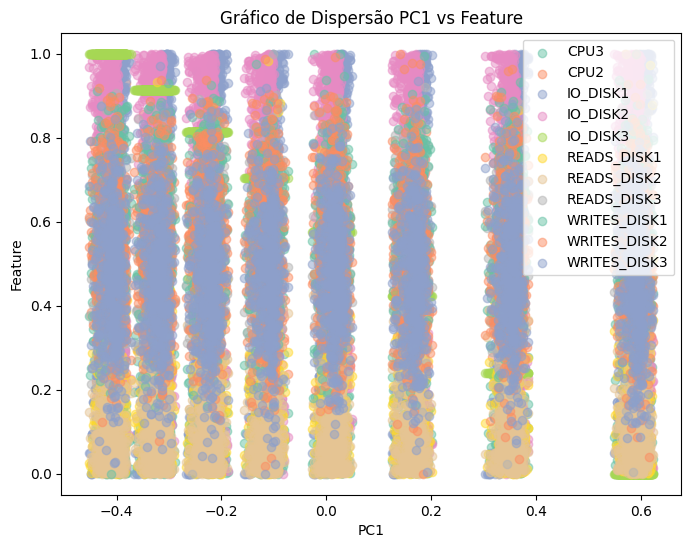

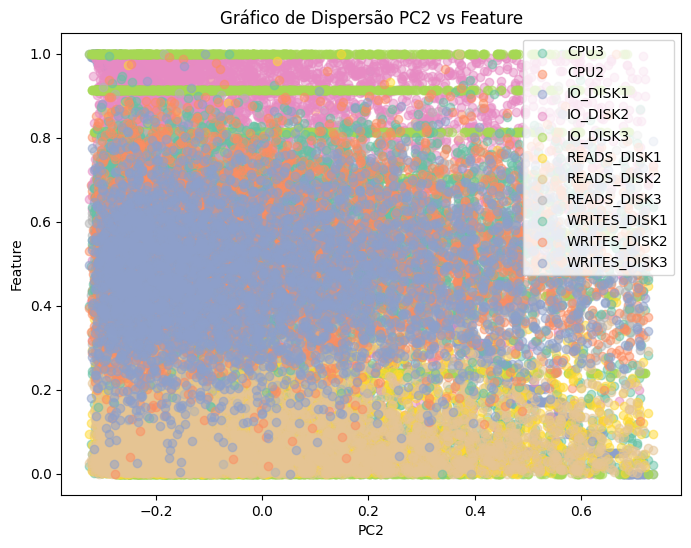

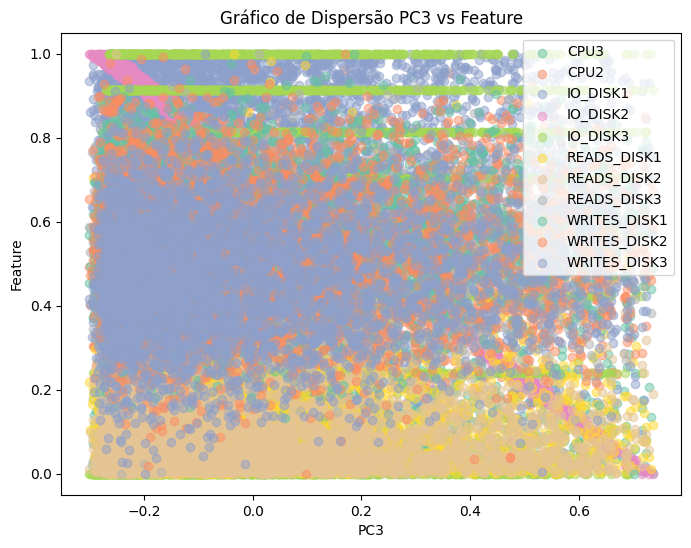

In [ ]:
# Defina uma paleta de cores personalizada
feature_colors = sns.color_palette("Set2", n_colors=len(df_normalized.columns))

# Escolha os números dos componentes principais que você deseja visualizar
component_numbers = [1, 2, 3]

# Criando uma matriz com os valores dos componentes principais escolhidos
components_values = components_df[['PC1', 'PC2', 'PC3']].values

# Criando gráficos de dispersão
for i, component_number in enumerate(component_numbers):
    plt.figure(figsize=(8, 6))

    for j, feature in enumerate(df_normalized.columns):
        plt.scatter(components_values[:, i], df_normalized[feature], label=feature, c=[feature_colors[j]], alpha=0.5)

    plt.title(f'Gráfico de Dispersão PC{component_number} vs Feature')
    plt.xlabel(f'PC{component_number}')
    plt.ylabel('Feature')

    # Adicionando uma legenda
    plt.legend()

    plt.show()

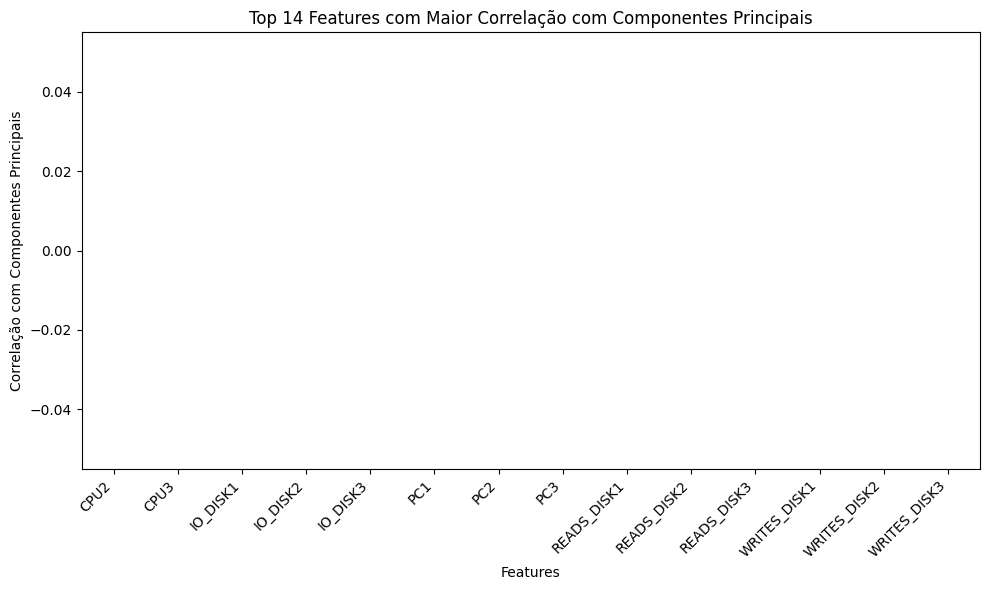

In [ ]:
# Calcular as correlações entre as features e os componentes principais
correlation_matrix = df_normalized.corrwith(components_df)

# Ordenar as correlações em ordem decrescente
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

# Selecionar as top N features com maior correlação
top_features = sorted_correlations.index[:14]

# Plotar um gráfico de barras para visualizar as correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=sorted_correlations[:14])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlação com Componentes Principais')
plt.title(f'Top {N} Features com Maior Correlação com Componentes Principais')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

<h2>Questão 7</h2>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

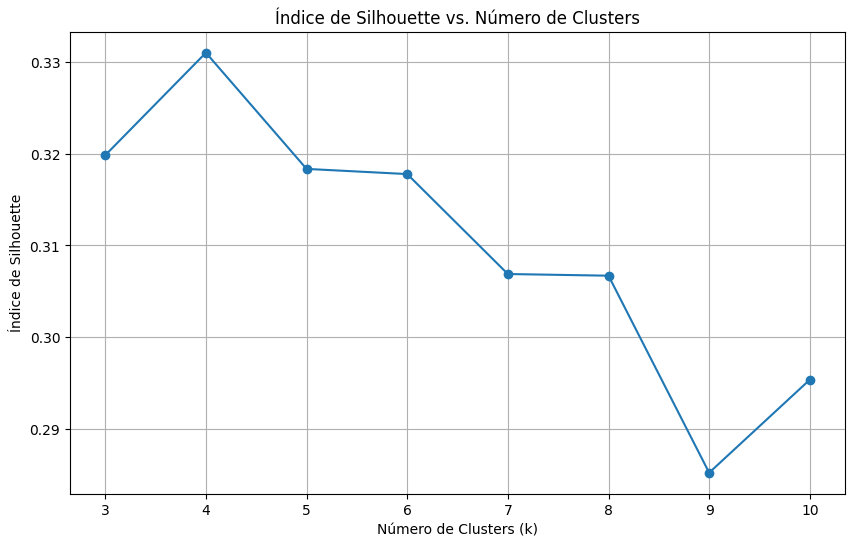


Número ideal de clusters: 4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_components = components_df[['PC1', 'PC2', 'PC3']].values

k_values = range(3, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_components)
    score = silhouette_score(pca_components, labels)
    silhouette_scores.append(score)

#Plotando o gráfico do Índice de Silhuette vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhouette')
plt.title('Índice de Silhouette vs. Número de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print(f'\nNúmero ideal de clusters: {best_k}')

<h2>Questão 8</h2>

In [72]:
best_k = 3  # Valor da quantidade de cluster encontrada do exercicio anterior
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(pca_components)

df_clustered = df_normalized.copy()
df_clustered['Cluster'] = labels

centroids = kmeans.cluster_centers_

cluster_summaries = []

for cluster_id in range(best_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    cluster_summary = cluster_data.describe()
    cluster_summaries.append(cluster_summary)

for cluster_id, summary in enumerate(cluster_summaries):
    print(f"Cluster {cluster_id}:")
    print(summary)
    print("Componente Representativo (Centróide):")
    print(centroids[cluster_id])
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
              CPU3         CPU2     IO_DISK1     IO_DISK2     IO_DISK3  \
count  2090.000000  2090.000000  2090.000000  2090.000000  2090.000000   
mean      0.134725     0.511461     0.831278     0.724255     0.803018   
std       0.129928     0.145783     0.116486     0.235366     0.149726   
min       0.000041     0.004247     0.559583     0.000000     0.575717   
25%       0.038169     0.412166     0.739346     0.586787     0.703752   
50%       0.095449     0.510192     0.849403     0.793073     0.814661   
75%       0.195326     0.607987     0.934435     0.912212     0.912489   
max       0.779112     0.965066     1.000000     1.000000     1.000000   

       READS_DISK1  READS_DISK2  READS_DISK3  WRITES_DISK1  WRITES_DISK2  \
count  2090.000000  2090.000000  2090.000000   2090.000000   2090.000000   
mean      0.131427     0.110626     0.531736      0.563136      0.517857   
std       0.132480     0.113272     0.126706      0.133489      0.146948   
min       0.000024